In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
 

In [27]:
dataset =pd.read_excel('check.xlsx')
dataset=dataset['Accidents']
dataset=np.array(dataset).reshape(-1,1)
dataset

array([[29],
       [26],
       [23],
       [27],
       [43],
       [34],
       [34],
       [32],
       [36],
       [34],
       [30],
       [33],
       [27],
       [32],
       [32],
       [29],
       [28],
       [33],
       [30],
       [30],
       [36],
       [29],
       [24],
       [26],
       [30],
       [23],
       [28],
       [17],
       [24],
       [24],
       [30],
       [37],
       [38],
       [26],
       [24],
       [38],
       [30],
       [43],
       [30],
       [32],
       [29],
       [21],
       [26],
       [28],
       [32],
       [23],
       [23],
       [26],
       [27],
       [33],
       [27],
       [30],
       [30],
       [29],
       [25],
       [34],
       [26],
       [29],
       [24],
       [25],
       [25],
       [ 3],
       [30],
       [24],
       [41],
       [27],
       [33],
       [24],
       [30],
       [32],
       [29],
       [18],
       [23],
       [25],
       [26],
       [17],
       [29],

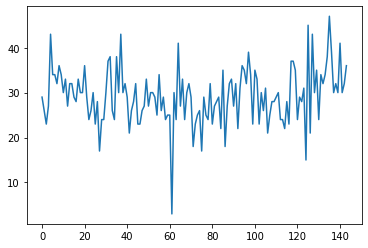

In [28]:
plt.plot(dataset)

In [29]:
# normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [30]:
# split into train and test sets
train_size = 100
test_size=44

In [31]:
train=dataset[0:train_size, :]
train.shape

(100, 1)

In [32]:
test=dataset[train_size:144, :]
test.shape

(44, 1)

In [33]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
# reshape into X=t and Y=t+1
look_back = 1
x_train,y_train = get_data(train, look_back)

In [35]:
x_train

array([[0.59090909],
       [0.52272727],
       [0.45454545],
       [0.54545455],
       [0.90909091],
       [0.70454545],
       [0.70454545],
       [0.65909091],
       [0.75      ],
       [0.70454545],
       [0.61363636],
       [0.68181818],
       [0.54545455],
       [0.65909091],
       [0.65909091],
       [0.59090909],
       [0.56818182],
       [0.68181818],
       [0.61363636],
       [0.61363636],
       [0.75      ],
       [0.59090909],
       [0.47727273],
       [0.52272727],
       [0.61363636],
       [0.45454545],
       [0.56818182],
       [0.31818182],
       [0.47727273],
       [0.47727273],
       [0.61363636],
       [0.77272727],
       [0.79545455],
       [0.52272727],
       [0.47727273],
       [0.79545455],
       [0.61363636],
       [0.90909091],
       [0.61363636],
       [0.65909091],
       [0.59090909],
       [0.40909091],
       [0.52272727],
       [0.56818182],
       [0.65909091],
       [0.45454545],
       [0.45454545],
       [0.522

In [36]:
y_train

array([0.52272727, 0.45454545, 0.54545455, 0.90909091, 0.70454545,
       0.70454545, 0.65909091, 0.75      , 0.70454545, 0.61363636,
       0.68181818, 0.54545455, 0.65909091, 0.65909091, 0.59090909,
       0.56818182, 0.68181818, 0.61363636, 0.61363636, 0.75      ,
       0.59090909, 0.47727273, 0.52272727, 0.61363636, 0.45454545,
       0.56818182, 0.31818182, 0.47727273, 0.47727273, 0.61363636,
       0.77272727, 0.79545455, 0.52272727, 0.47727273, 0.79545455,
       0.61363636, 0.90909091, 0.61363636, 0.65909091, 0.59090909,
       0.40909091, 0.52272727, 0.56818182, 0.65909091, 0.45454545,
       0.45454545, 0.52272727, 0.54545455, 0.68181818, 0.54545455,
       0.61363636, 0.61363636, 0.59090909, 0.5       , 0.70454545,
       0.52272727, 0.59090909, 0.47727273, 0.5       , 0.5       ,
       0.        , 0.61363636, 0.47727273, 0.86363636, 0.54545455,
       0.68181818, 0.47727273, 0.61363636, 0.65909091, 0.59090909,
       0.34090909, 0.45454545, 0.5       , 0.52272727, 0.31818

In [37]:
x_test,y_test=get_data(test, look_back)

In [38]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [39]:
x_train.shape

(98, 1, 1)

In [40]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
98/98 [==============================] - 1s 7ms/step - loss: 0.2680
Epoch 2/100
98/98 [==============================] - 0s 179us/step - loss: 0.2600
Epoch 3/100
98/98 [==============================] - 0s 221us/step - loss: 0.2526
Epoch 4/100
98/98 [==============================] - 0s 147us/step - loss: 0.2449
Epoch 5/100
98/98 [==============================] - 0s 182us/step - loss: 0.2374
Epoch 6/100
98/98 [==============================] - 0s 195us/step - loss: 0.2302
Epoch 7/100
98/98 [==============================] - 0s 173us/step - loss: 0.2230
Epoch 8/100
98/98 [==============================] - 0s 151us/step - loss: 0.2159
Epoch 9/100
98/98 [==============================] - 0s 218us/step - loss: 0.2090
Epoch 10/100
98/98 [==============================] - 0s 225us/step - loss: 0.2022
Epoch 11/100
98/98 [==============================] - 0s 176us/step - loss: 0.1955
Epoch 12/100
98/98 [==============================] - 0s 142us/step - loss: 0.1892
Epoch 13/100
98

98/98 [==============================] - 0s 139us/step - loss: 0.0183
Epoch 100/100
98/98 [==============================] - 0s 137us/step - loss: 0.0184


In [43]:
# make predictions
y_pred=model.predict(x_test)

In [44]:
 # invert predictions
y_pred=scaler.inverse_transform(y_pred)


In [45]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

In [46]:
y_pred

array([[31.23408 ],
       [30.468891],
       [26.433516],
       [29.293364],
       [27.677721],
       [29.688803],
       [25.590508],
       [27.265877],
       [28.492111],
       [28.492111],
       [28.894428],
       [29.293364],
       [26.851097],
       [26.851097],
       [26.01327 ],
       [28.492111],
       [26.433516],
       [31.983849],
       [31.983849],
       [31.23408 ],
       [26.851097],
       [28.894428],
       [28.492111],
       [29.688803],
       [23.01017 ],
       [34.822083],
       [25.590508],
       [34.137085],
       [29.293364],
       [31.23408 ],
       [26.851097],
       [30.853386],
       [30.080677],
       [30.853386],
       [32.35282 ],
       [35.490547],
       [32.7178  ],
       [29.293364],
       [30.080677],
       [29.293364],
       [33.43561 ],
       [29.293364]], dtype=float32)

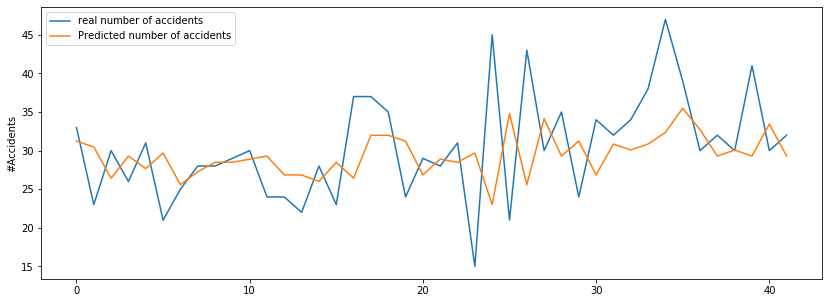

In [47]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of accidents')
plt.plot(y_pred,label='Predicted number of accidents')
plt.ylabel('#Accidents')
plt.legend()
plt.show()